In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from pathlib import Path
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 32

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
!cd gdrive/My\ Drive/art && ls

art.ipynb  costumes.zip  data  Data.zip


In [7]:
!cd gdrive/My\ Drive/art && unzip costumes.zip -d costumes

Archive:  costumes.zip
   creating: costumes/American or European/
  inflating: costumes/American or European/103888-0.jpg  
  inflating: costumes/American or European/103895-0.jpg  
  inflating: costumes/American or European/103916-0.jpg  
  inflating: costumes/American or European/103917-0.jpg  
  inflating: costumes/American or European/103921-0.jpg  
  inflating: costumes/American or European/103925-0.jpg  
  inflating: costumes/American or European/103928-0.jpg  
  inflating: costumes/American or European/103931-0.jpg  
  inflating: costumes/American or European/103934-0.jpg  
  inflating: costumes/American or European/103948-0.jpg  
  inflating: costumes/American or European/103950-0.jpg  
  inflating: costumes/American or European/103954-0.jpg  
  inflating: costumes/American or European/103956-0.jpg  
  inflating: costumes/American or European/103959-0.jpg  
  inflating: costumes/American or European/103967-0.jpg  
  inflating: costumes/American or European/106645-0.jpg  
  inf

In [0]:
DIR = Path('gdrive') / 'My Drive' / 'art' / 'costumes'

In [12]:
list(DIR.iterdir())

[PosixPath('gdrive/My Drive/art/costumes/American or European'),
 PosixPath('gdrive/My Drive/art/costumes/China'),
 PosixPath('gdrive/My Drive/art/costumes/Japan')]

In [0]:
src = (ImageList.from_folder(DIR)
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(max_zoom=1.0, max_rotate=5), size=224))

In [0]:
db  = src.databunch(bs=16, num_workers=0).normalize(imagenet_stats)

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

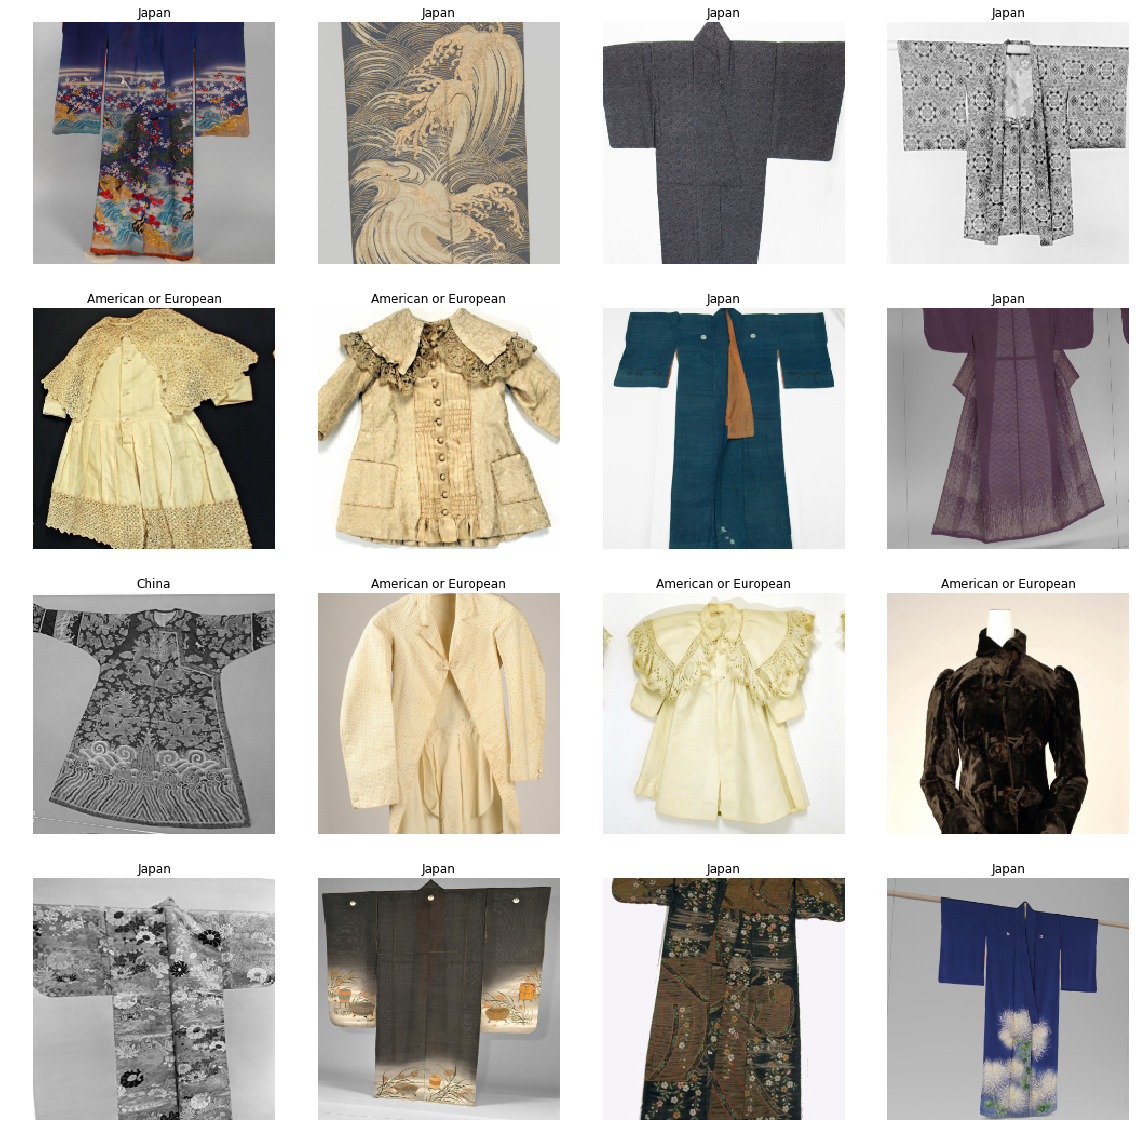

In [16]:
db.show_batch(row=3)

In [29]:
learn = cnn_learner(db, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:02, 42764910.09it/s]


In [0]:
dir(models)

['BasicBlock',
 'Darknet',
 'DynamicUnet',
 'ResLayer',
 'ResNet',
 'SqueezeNet',
 'UnetBlock',
 'WideResNet',
 'XResNet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'darknet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'unet',
 'vgg16_bn',
 'vgg19_bn',
 'wrn',
 'wrn_22',
 'xception',
 'xresnet',
 'xresnet101',
 'xresnet152',
 'xresnet18',
 'xresnet34',
 'xresnet50']

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


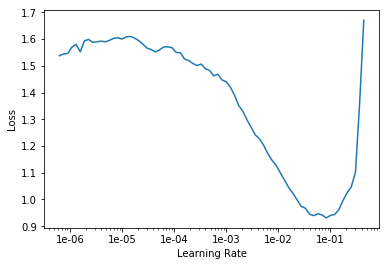

In [31]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5, 5e-3)

In [0]:
learn.save('res34-stage-1')

In [0]:
learn.unfreeze()

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


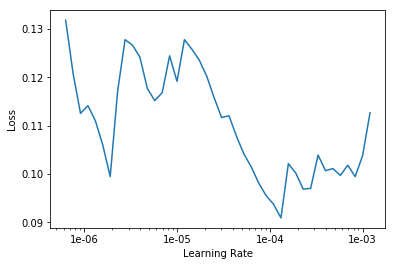

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(5, 7e-5)

In [0]:
learn.save('res34-stage-2')

In [45]:
learn = cnn_learner(db, models.vgg16_bn, metrics=error_rate)
learn.load('vgg16-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (153 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
American or European,American or European,American or European,American or European,American or European
Path: gdrive/My Drive/art/costumes;

Valid: LabelList (38 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Japan,American or European,American or European,Japan,Japan
Path: gdrive/My Drive/art/costumes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [46]:
dir(learn)

['TTA',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_test_writeable_path',
 'add_time',
 'backward',
 'bn_wd',
 'callback_fns',
 'callbacks',
 'clip_grad',
 'create_opt',
 'data',
 'destroy',
 'dl',
 'export',
 'fit',
 'fit_one_cycle',
 'freeze',
 'freeze_to',
 'get_preds',
 'init',
 'interpret',
 'layer_groups',
 'load',
 'loss_func',
 'lr_find',
 'lr_range',
 'metrics',
 'mixup',
 'model',
 'model_dir',
 'opt',
 'opt_func',
 'path',
 'pred_batch',
 'predict',
 'purge',
 'save',
 'show_results',
 'split',
 'summary',
 'to_fp16',
 'to_fp32',
 'train_bn',
 'true_wd',
 'tta_only'

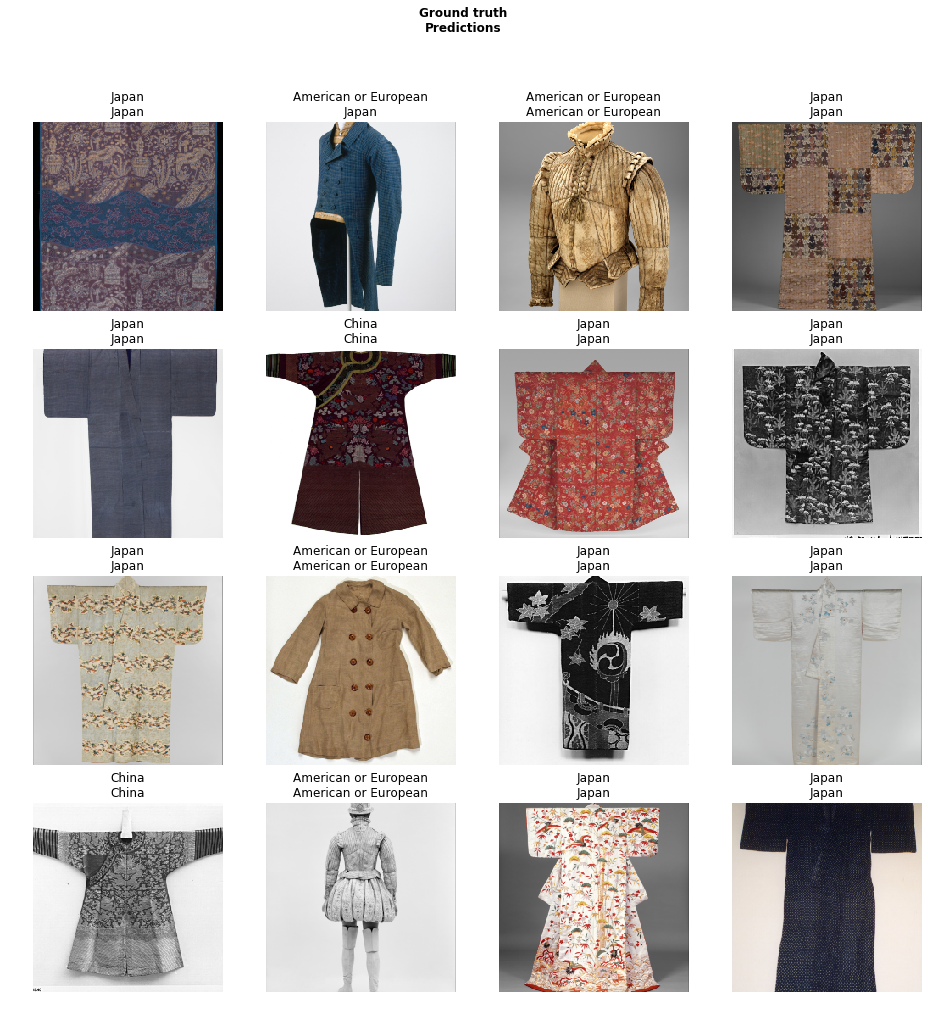

In [47]:
learn.show_results()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

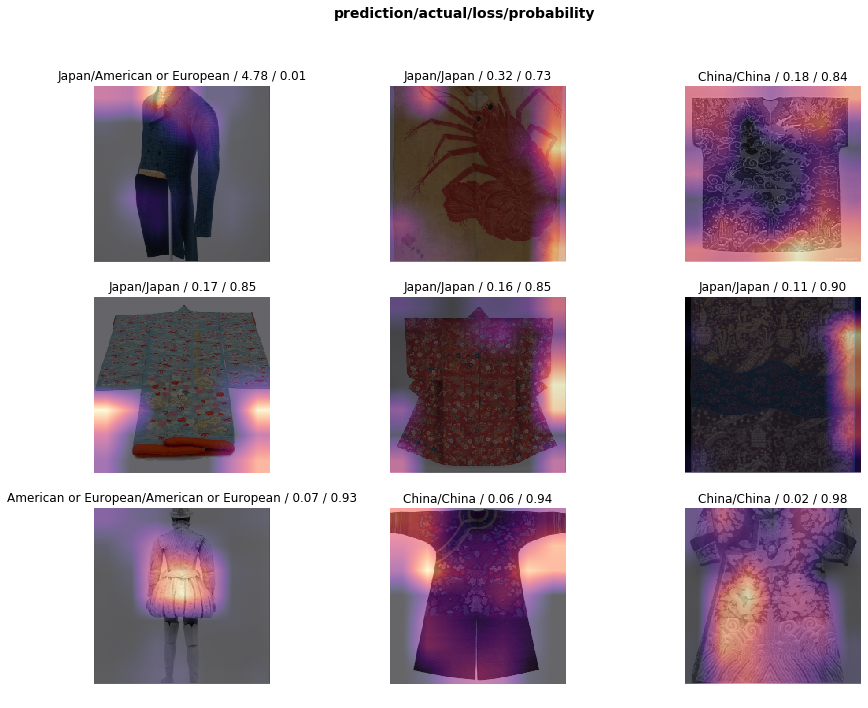

In [49]:
interp.plot_top_losses(9, figsize=(15,11))

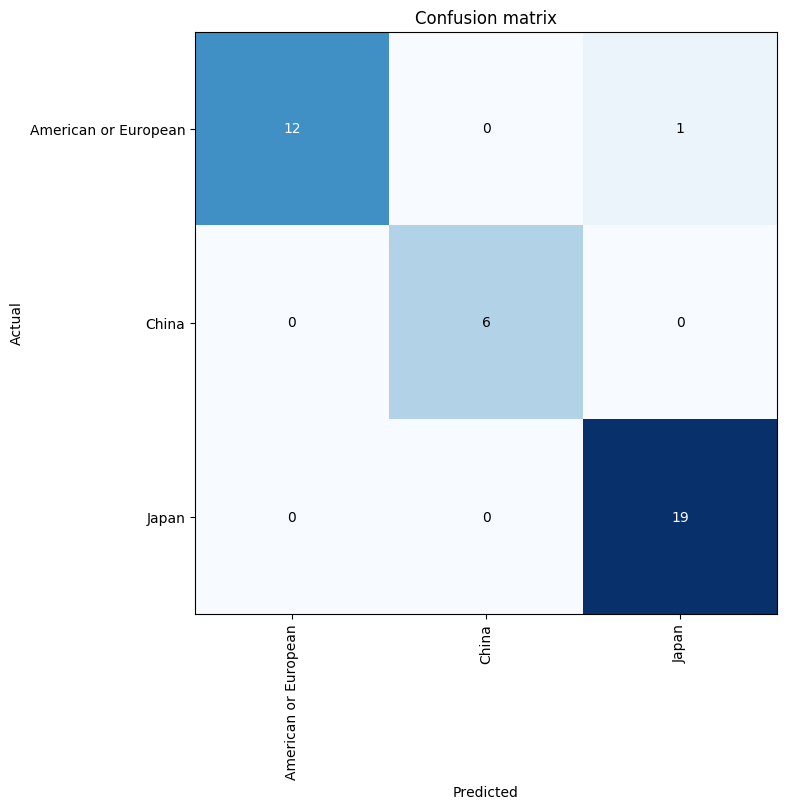

In [56]:
interp.plot_confusion_matrix(figsize=(8, 8), dpi=100)

In [52]:
help(interp.plot_confusion_matrix)

Help on method plot_confusion_matrix in module fastai.train:

plot_confusion_matrix(normalize:bool=False, title:str='Confusion matrix', cmap:Any='Blues', slice_size:int=1, norm_dec:int=2, plot_txt:bool=True, return_fig:bool=None, **kwargs) -> Union[matplotlib.figure.Figure, NoneType] method of fastai.train.ClassificationInterpretation instance
    Plot the confusion matrix, with `title` and using `cmap`.

